In [4]:
#import pandas to handle the data structure
import pandas as pd
#import dataset
df = pd.read_csv('data/crx.csv',header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
#initial data description
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [7]:
#check missing values
df.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [18]:
#Handle the missing values
#We will fill the missing values in numeric columns with the median
#and fill the missing values categorical column with the most freq

data = df.fillna(
            {
                0: df.iloc[:,0].mode()[0],
                1: df.iloc[:,1].median(),
                2: df.iloc[:,2].mode()[0],
                3: df.iloc[:,3].mode()[0],
                4: df.iloc[:,4].mode()[0],
                5: df.iloc[:,5].mode()[0],
                6: df.iloc[:,6].mode()[0],
                13: df.iloc[:,13].median()
            }
         )

In [19]:
#Verify that missing values are handled
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [21]:
#Encode using dummy variable encoding assuming the categorical variables are nominal
data = pd.get_dummies(data,columns=[0,3,4,5,6,8,9,11,12],drop_first=True)
data.head()

,1,2,7,10,13,14,15,0_b,3_u,3_y,...,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_t,12_p,12_s
0,30.83,0.000,1.25,1,202.0,0,+,1,1,0,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,3.04,6,43.0,560,+,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0,280.0,824,+,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5,100.0,3,+,1,1,0,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,+,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [30]:
#shuffle the dataset for proper sampling

data = data.sample(frac = 1, random_state=1)

In [31]:
#Extract dependent and independent variables
y=data.iloc[:,6]
X=data.drop(15,axis=1)
X.head()

,1,2,7,10,13,14,0_b,3_u,3_y,4_gg,...,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_t,12_p,12_s
666,21.75,11.75,0.250,0,180.0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
520,20.42,7.50,1.500,1,160.0,234,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0
681,27.83,1.00,3.000,0,176.0,537,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23,27.42,14.50,3.085,1,120.0,11,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
65,34.17,1.54,1.540,1,520.0,50000,1,1,0,0,...,0,0,0,1,0,1,1,1,0,0


In [32]:
y.head()

666    -
520    +
681    -
23     +
65     +
Name: 15, dtype: object

In [33]:
#Ensuring that all variables are numeric now
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1,690.0,31.514116,11.860245,13.75,22.670,28.46,37.7075,80.25
2,690.0,4.758725,4.978163,0.00,1.000,2.75,7.2075,28.00
7,690.0,2.223406,3.346513,0.00,0.165,1.00,2.6250,28.50
10,690.0,2.400000,4.862940,0.00,0.000,0.00,3.0000,67.00
13,690.0,183.562319,172.190278,0.00,80.000,160.00,272.0000,2000.00
14,690.0,1017.385507,5210.102598,0.00,0.000,5.00,395.5000,100000.00
0_b,690.0,0.695652,0.460464,0.00,0.000,1.00,1.0000,1.00
3_u,690.0,0.760870,0.426862,0.00,1.000,1.00,1.0000,1.00
3_y,690.0,0.236232,0.425074,0.00,0.000,0.00,0.0000,1.00
4_gg,690.0,0.002899,0.053799,0.00,0.000,0.00,0.0000,1.00


In [34]:
#feature scaling as the range of values for different features vary a lot
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X_scaled.head()

,1,2,7,10,13,14,0_b,3_u,3_y,4_gg,...,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_t,12_p,12_s
0,0.120301,0.419643,0.008772,0.000000,0.090,0.00000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.100301,0.267857,0.052632,0.014925,0.080,0.00234,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.211729,0.035714,0.105263,0.000000,0.088,0.00537,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.205564,0.517857,0.108246,0.014925,0.060,0.00011,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.307068,0.055000,0.054035,0.014925,0.260,0.50000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [36]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()

0.8593644979163866

Let's also look at the test scores of a simple split

In [57]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.25)
X_test.head()

,1,2,7,10,13,14,0_b,3_u,3_y,4_gg,...,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_t,12_p,12_s
14,0.253083,0.380893,0.002982,0.179104,0.0645,0.00003,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
586,0.139098,0.022321,0.004386,0.000000,0.0900,0.00001,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
140,0.310827,0.047679,0.004386,0.000000,0.2200,0.04500,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
492,0.131579,0.302143,0.086316,0.000000,0.0820,0.00000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.388421,0.178571,0.000000,0.029851,0.0085,0.00001,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
#train the model on the training set
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
#Test accuracy
model.score(X_test,y_test)

0.8670520231213873

In [61]:
#Let's look at some other scores as well
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           +       0.88      0.83      0.86        82
           -       0.85      0.90      0.88        91

    accuracy                           0.87       173
   macro avg       0.87      0.87      0.87       173
weighted avg       0.87      0.87      0.87       173



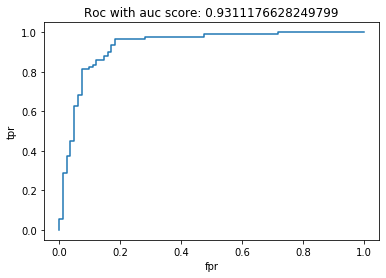

In [62]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
#taking the second column for correct auc score
y_pred_prob = model.predict_proba(X_test)[:,1] 

#second column represents the '-' class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='-')

#plot the curve with auc score
import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()


AUC is an excellent performance measure for Logistic Regression Model as it is robust against probability threshold values and truly depicts if the model is good or not for the data at hand. Here 0.93 means that Logistic Regression Model is a very good fit for the data.